In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
cd /content/

/content


In [3]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/quandang/vietnamese-foods",force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ngan437
Your Kaggle Key: ··········


100%|██████████| 4.17G/4.17G [03:23<00:00, 22.0MB/s]


In [8]:
ls

Images/  LICENSE  Urls/


In [10]:
cd Images/Train

/content/vietnamese-foods/Images/Train


In [11]:
ls

'Banh beo'/      'Banh khot'/         'Bun mam'/         'Goi cuon'/
'Banh bot loc'/  'Banh mi'/           'Bun rieu'/        'Hu tieu'/
'Banh can'/      'Banh pia'/          'Bun thit nuong'/  'Mi quang'/
'Banh canh'/     'Banh tet'/          'Ca kho to'/       'Nem chua'/
'Banh chung'/    'Banh trang nuong'/  'Canh chua'/        Pho/
'Banh cuon'/     'Banh xeo'/          'Cao lau'/         'Xoi xeo'/
'Banh duc'/      'Bun bo Hue'/        'Chao long'/
'Banh gio'/      'Bun dau mam tom'/   'Com tam'/


In [12]:
import shutil

shutil.rmtree('Banh beo')
shutil.rmtree('Banh bot loc')
shutil.rmtree('Banh can')     
shutil.rmtree('Banh khot')
shutil.rmtree('Bun mam')         
shutil.rmtree('Goi cuon')  
shutil.rmtree('Banh mi') 
shutil.rmtree('Bun rieu')        
shutil.rmtree('Hu tieu')
shutil.rmtree('Banh pia')
shutil.rmtree('Bun thit nuong')
shutil.rmtree('Mi quang')
shutil.rmtree('Banh canh')    
shutil.rmtree('Banh tet')          
shutil.rmtree('Ca kho to')
shutil.rmtree('Nem chua')
shutil.rmtree('Banh chung')    
shutil.rmtree('Banh trang nuong')
shutil.rmtree('Canh chua')
shutil.rmtree("Pho")
shutil.rmtree('Banh cuon')
shutil.rmtree('Cao lau')        


In [13]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=10,  
                             zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1),
                             rescale=1/255.0)

valid_datagen = ImageDataGenerator(rescale=1/255.0)

test_datagen = ImageDataGenerator(rescale=1/255.0)

In [15]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [17]:
im_size = 224
batch_size = 64

train_generator = train_datagen.flow_from_directory(
    directory=r"./",
    target_size=(im_size, im_size),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 5219 images belonging to 8 classes.


In [34]:
cd /content/vietnamese-foods/Images/Train

/content/vietnamese-foods/Images/Train


In [35]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [28]:
shutil.rmtree('Banh beo')
shutil.rmtree('Banh bot loc')
shutil.rmtree('Banh can')     
shutil.rmtree('Banh khot')
shutil.rmtree('Bun mam')         
shutil.rmtree('Goi cuon')  
shutil.rmtree('Banh mi') 
shutil.rmtree('Bun rieu')        
shutil.rmtree('Hu tieu')
shutil.rmtree('Banh pia')
shutil.rmtree('Bun thit nuong')
shutil.rmtree('Mi quang')
shutil.rmtree('Banh canh')    
shutil.rmtree('Banh tet')          
shutil.rmtree('Ca kho to')
shutil.rmtree('Nem chua')
shutil.rmtree('Banh chung')    
shutil.rmtree('Banh trang nuong')
shutil.rmtree('Canh chua')
shutil.rmtree("Pho")
shutil.rmtree('Banh cuon')
shutil.rmtree('Cao lau')        


In [29]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"./",
    target_size=(im_size, im_size),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 745 images belonging to 8 classes.


In [33]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [30]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [21]:
for image in train_generator:
  print(type(image))
  print(type(image[0]))
  print(image[0].shape)
  break

<class 'tuple'>
<class 'numpy.ndarray'>
(64, 224, 224, 3)


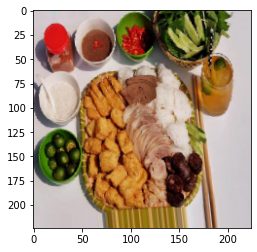

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image[0][9])

In [36]:
from pathlib import Path
path = Path('/content/vietnamese-foods/Images/Train')
class_names = list(path.glob('*'))
for class_name in class_names:
  print(class_name)

/content/vietnamese-foods/Images/Train/Banh gio
/content/vietnamese-foods/Images/Train/Bun dau mam tom
/content/vietnamese-foods/Images/Train/Banh xeo
/content/vietnamese-foods/Images/Train/Bun bo Hue
/content/vietnamese-foods/Images/Train/Com tam
/content/vietnamese-foods/Images/Train/Chao long
/content/vietnamese-foods/Images/Train/Banh duc
/content/vietnamese-foods/Images/Train/Xoi xeo


In [51]:
import cv2
X = []
y = []
food = ['Banh gio', 'Bun dau mam tom', 'Banh xeo',   'Bun bo Hue',  'Com tam','Chao long',  'Banh duc',   'Xoi xeo']
# food.index('dandelion')
for class_name in class_names:
  print(class_name)
  images_path = list(class_name.glob('*'))
  for im_path in images_path:
    img = cv2.imread(str(im_path))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64))
    label = food.index(str(class_name).split('/')[-1])
    X.append(img)
    y.append(label)

/content/vietnamese-foods/Images/Train/Banh gio
/content/vietnamese-foods/Images/Train/Bun dau mam tom
/content/vietnamese-foods/Images/Train/Banh xeo
/content/vietnamese-foods/Images/Train/Bun bo Hue
/content/vietnamese-foods/Images/Train/Com tam
/content/vietnamese-foods/Images/Train/Chao long
/content/vietnamese-foods/Images/Train/Banh duc
/content/vietnamese-foods/Images/Train/Xoi xeo


In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [53]:
# X_train = X_train.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255
# X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

In [54]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(5219, 8)


[0. 0. 1. 0. 0. 0. 0. 0.]
(4175, 64, 64, 3)
(1044, 64, 64, 3)
(4175, 8)
(1044, 8)


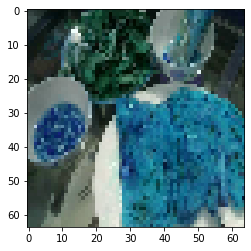

In [57]:
plt.imshow(X_train[5])
print(y_train[5])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [58]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
import cv2
import numpy as np
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)       

In [59]:
model.fit(X_train,y_train,epochs=200,batch_size=128)

Epoch 1/200
33/33 [==============================] - 10s 25ms/step - loss: 42.7477 - accuracy: 0.1775
Epoch 2/200
33/33 [==============================] - 1s 17ms/step - loss: 2.5839 - accuracy: 0.2192
Epoch 3/200
33/33 [==============================] - 1s 17ms/step - loss: 2.2860 - accuracy: 0.1993
Epoch 4/200
33/33 [==============================] - 1s 17ms/step - loss: 2.2231 - accuracy: 0.2223
Epoch 5/200
33/33 [==============================] - 1s 17ms/step - loss: 2.8067 - accuracy: 0.2321
Epoch 6/200
33/33 [==============================] - 1s 17ms/step - loss: 1.9734 - accuracy: 0.2769
Epoch 7/200
33/33 [==============================] - 1s 18ms/step - loss: 1.9395 - accuracy: 0.2922
Epoch 8/200
33/33 [==============================] - 1s 18ms/step - loss: 2.0468 - accuracy: 0.3147
Epoch 9/200
33/33 [==============================] - 1s 17ms/step - loss: 1.7474 - accuracy: 0.3672
Epoch 10/200
33/33 [==============================] - 1s 17ms/step - loss: 1.7858 - accuracy: 0.41

In [60]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 6ms/step - loss: 38.8341 - accuracy: 0.4464


[38.834102630615234, 0.44636014103889465]

(64, 64, 3)
1/1 [==============================] - 0s 232ms/step
Banh duc


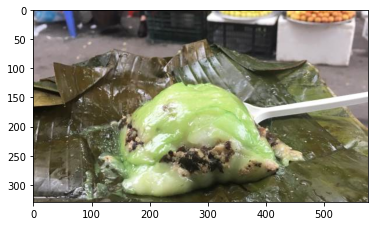

In [65]:
import cv2
# url = 'download (5).jpeg'
# n=2
n = 3
images_test = list(Path('/content/vietnamese-foods/Images/Train/Banh gio/').glob('*g'))
# print(images_test)
url = images_test[n]
image = cv2.imread(str(url))
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img, (64,64))
img = img.astype('float32')/255
print(img.shape)
pred = model.predict(img.reshape((1, 64, 64, 3)))
print(food[pred.argmax()])